# Add cat whiskers to face

In [1]:
# image of Donald Trump from https://nyacknewsandviews.com/2016/03/donald-trump-is-funny-and-serious/
# image of LeBron James from https://imgflip.com/memetemplate/68961133/Funny-Face-Lebron-James
# image of Cristiano Ronaldo from https://www.hankookilbo.com/News/Read/A2020082114140004396

# !wget https://nyacknewsandviews.com/wp-content/uploads/2016/03/trump-600x450.jpg
# !mv trump-600x450.jpg trump.jpg && mv trump.jpg ~/workplace/Miniprojects/Sticker_App/images

# !wget https://i.imgflip.com/1522r1.jpg
# !mv 1522r1.jpg lebron.jpg && mv lebron.jpg ~/workplace/Miniprojects/Sticker_App/images

# !wget https://newsimg.hankookilbo.com/cms/articlerelease/2020/08/21/a35e7cad-7439-4fcb-9953-6f9951aad808.jpg
# !mv a35e7cad-7439-4fcb-9953-6f9951aad808.jpg cristiano.jpg && mv cristiano.jpg ~/workplace/Miniprojects/Sticker_App/images

In [2]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def apply_sticker(image, sticker):
    
    my_image_path = os.getenv('HOME')+'/workplace/Miniprojects/Camera_Sticker/images/'+str(image)
    img_bgr = cv2.imread(my_image_path)
    img_bgr = cv2.resize(img_bgr, (640, 360))
    img_show = img_bgr.copy()
    
    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)
        
    model_path = os.getenv('HOME')+'/workplace/Miniprojects/Camera_Sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []    
    
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    pos = {'cat_whiskers':'mouth'}
    coord = {'mouth':[48, 54]}
    reverse = ['cat_whiskers']
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = sum([landmark[i][0] for i in coord[pos[sticker]]]) // len(coord[pos[sticker]])
        y = sum([landmark[i][1] for i in coord[pos[sticker]]]) // len(coord[pos[sticker]])
        w = dlib_rect.width()
        h = dlib_rect.width()
        
    sticker_path = os.getenv('HOME')+'/workplace/Miniprojects/Camera_Sticker/images/'+str(sticker)+'.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        (x1, x2) = (landmark[i][0] for i in coord[pos[sticker]])
        (y1, y2) = (landmark[i][1] for i in coord[pos[sticker]])
        
    slope = (y2 - y1) / (x2 - x1)
    angle = -180 * np.arctan(slope) / np.pi
    
    (sh, sw) = img_sticker.shape[:2]
    (cX, cY) = (sw / 2, sh / 2)

    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    img_sticker = cv2.warpAffine(img_sticker, M, (sw, sh), borderValue=(255, 255, 255))
    
    refined_x = x - w // 2
    refined_y = y - h // 2
    
    if sticker in reverse:
        background = 255
    else:
        background = 0
    
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==background,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

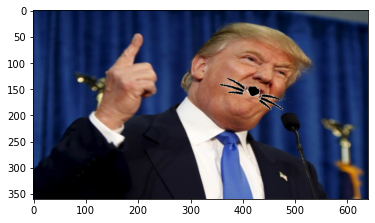

In [4]:
apply_sticker('trump.jpg', 'cat_whiskers')

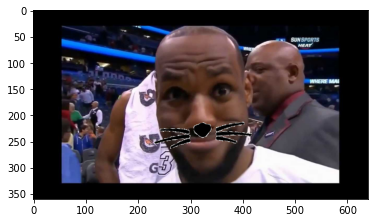

In [5]:
apply_sticker('lebron.jpg', 'cat_whiskers')

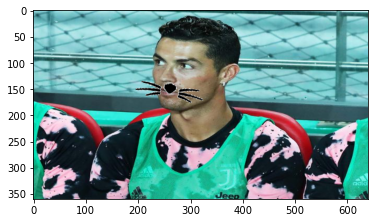

In [6]:
apply_sticker('cristiano.jpg', 'cat_whiskers')